In [ ]:
# Install trimesh and imageio for 3D processing and gif creation
!pip install trimesh imageio[ffmpeg] -q

In [ ]:


import trimesh
import imageio
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image, display

#  Create a simple 3D mesh to work with (an icosphere)
# This mesh will be used as the base to export to various formats
mesh = trimesh.creation.icosphere(subdivisions=3, radius=1.0)

# Convert the mesh to different formats (OBJ, STL, GLB)
# These are the actual "conversions" between file types requested in the workshop
mesh.export('icosphere.obj')
mesh.export('icosphere.stl')
mesh.export('icosphere.glb')  # GLB is binary version of GLTF

#  Load the saved files back for analysis and visualization
# OBJ and STL load as standard Trimesh objects
obj_mesh = trimesh.load('icosphere.obj')
stl_mesh = trimesh.load('icosphere.stl')

# GLB loads as a full scene — we need to extract the mesh from it
glb_scene = trimesh.load('icosphere.glb')
glb_mesh = list(glb_scene.geometry.values())[0]  # take first mesh

#  Store all the loaded meshes for easy iteration
meshes = {
    "OBJ": obj_mesh,
    "STL": stl_mesh,
    "GLB": glb_mesh
}

#  Print structural information about each mesh
# Useful to verify whether formats retain geometry correctly
print("Mesh Comparison (Vertices, Faces, Is Watertight):\n")
for name, m in meshes.items():
    print(f"{name}:")
    print(f"  Vertices: {len(m.vertices)}")
    print(f"  Faces:    {len(m.faces)}")
    print(f"  Watertight: {m.is_watertight}")  # Checks if the mesh is closed
    print("-" * 30)

#  Check number of connected components
# Should be 1 for a simple object like an icosphere
for name, m in meshes.items():
    components = trimesh.graph.split(m)
    print(f"{name} has {len(components)} connected component(s)")

# Generate labeled images and GIF
# We'll use matplotlib to render each mesh and overlay the format name

images = []  # this will store images to generate the final GIF

def plot_and_save(mesh, name):
    # Create a 3D plot using matplotlib
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111, projection='3d')

    # Extract coordinates and face indices
    vertices = mesh.vertices
    faces = mesh.faces
    x = vertices[:, 0]
    y = vertices[:, 1]
    z = vertices[:, 2]

    # Plot the triangular surface of the mesh
    ax.plot_trisurf(x, y, triangles=faces, Z=z,
                    color='lightblue', edgecolor='gray',
                    linewidth=0.2, alpha=0.95)

    # Add label in top-right corner with format name
    ax.text2D(0.95, 0.95, name, transform=ax.transAxes,
              ha='right', va='top', fontsize=14, weight='bold',
              bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1))

    # Hide axis for clean visuals
    ax.axis('off')

    # Save PNG with the name of the format
    filename = f'{name.lower()}_render.png'
    plt.savefig(filename, bbox_inches='tight', dpi=150)
    plt.close()

    # Load image back and store for the animated GIF
    images.append(imageio.v2.imread(filename))

# Apply the visualization and labeling to all formats
for name, mesh in meshes.items():
    plot_and_save(mesh, name)

#  Create the final animated GIF from labeled renders
# This will visually cycle through OBJ → STL → GLB
imageio.mimsave('3d_formats_comparison.gif', images, duration=1)
print("✅ PNGs and GIF created successfully.")




Mesh Comparison (Vertices, Faces, Is Watertight):

OBJ:
  Vertices: 642
  Faces:    1280
  Watertight: True
------------------------------
STL:
  Vertices: 642
  Faces:    1280
  Watertight: True
------------------------------
GLB:
  Vertices: 642
  Faces:    1280
  Watertight: True
------------------------------
OBJ has 1 connected component(s)
STL has 1 connected component(s)
GLB has 1 connected component(s)
✅ PNGs and GIF created successfully.



--- Rendered Images ---
OBJ Render:


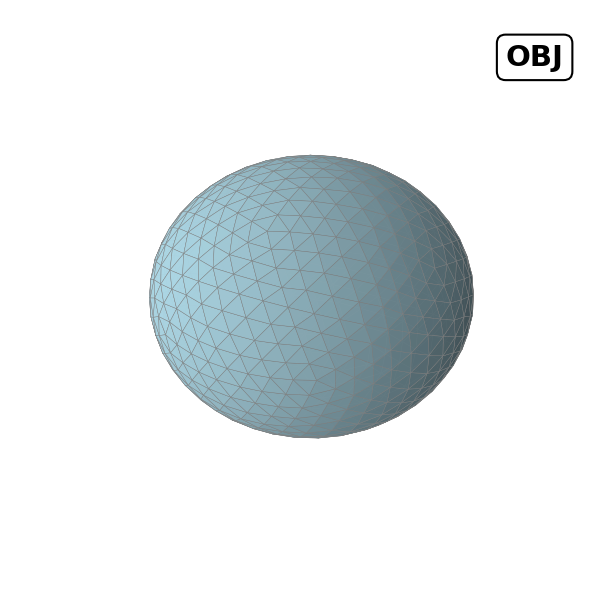

STL Render:


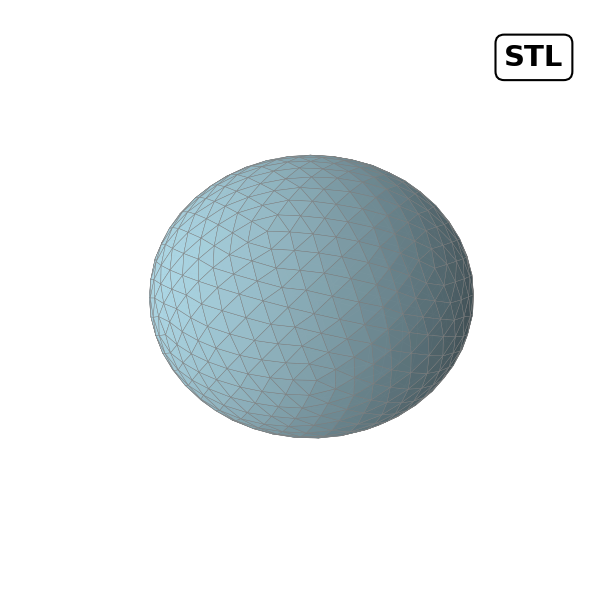

GLB Render:


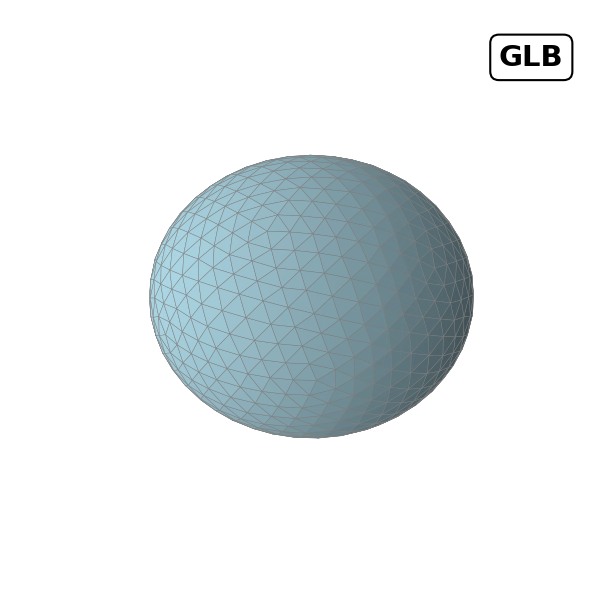

Format Comparison GIF:


In [ ]:
# Display all generated visual outputs in Colab
# This ensures reviewers can see your results directly in the notebook

print("\n--- Rendered Images ---")
for name in meshes.keys():
    print(f"{name} Render:")
    display(Image(filename=f'{name.lower()}_render.png'))

from IPython.display import HTML

# Display the animated GIF using HTML so it loops and plays
print("Format Comparison GIF:")
display(HTML('<img src="3d_formats_comparison.gif" loop autoplay>'))




